In [13]:
import numpy as np
from scipy.io import loadmat, savemat
from scipy.signal import find_peaks
import os
import matplotlib.pyplot as plt
from matplotlib import interactive
import json

datajson_save_dir = os.path.join(os.getcwd(), 'data.json')
with open(datajson_save_dir, 'r') as f:
    loaded_data = json.load(f)
    loaded_data_ultrasonic = loaded_data['ultrasound']
    loaded_data_signal = loaded_data['sig']

    

%matplotlib inline

interactive(True)
index = len(loaded_data_ultrasonic) -1 # get the latest recording

# datamat_save_dir = os.path.join(os.getcwd(), 'data.mat')
# cwd_path = os.getcwd()
# loaded_data = loadmat(datamat_save_dir)
# loaded_data_ultrasonic = loaded_data['ultrasound']
# loaded_data_signal = loaded_data['sig']

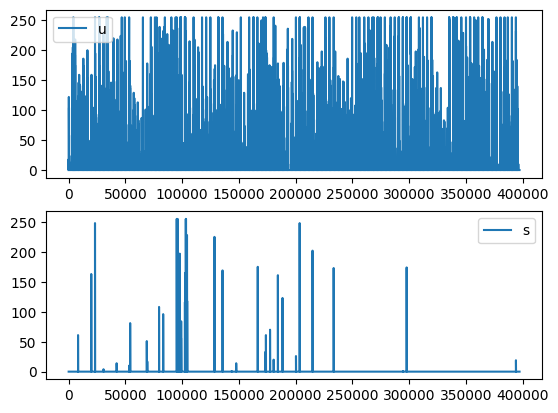

In [15]:
fig, axes  = plt.subplots(nrows= 2, ncols=1)
axes[0].plot(loaded_data_ultrasonic[index])
axes[0].legend('ultrasonic')
axes[1].plot(loaded_data_signal[index])
axes[1].legend('signal')

In [7]:

# is_255 = loaded_data_signal[index] == 255
# runs = np.diff(np.where(np.concatenate(([0], is_255, [0])))[0])
# starts = np.where(np.diff(np.concatenate(([0], is_255, [0])) == 1))[0]

In [8]:
threshold = 0.8
peaks, _ = find_peaks(loaded_data_signal[index], height=threshold)
np.diff(peaks) < 20

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

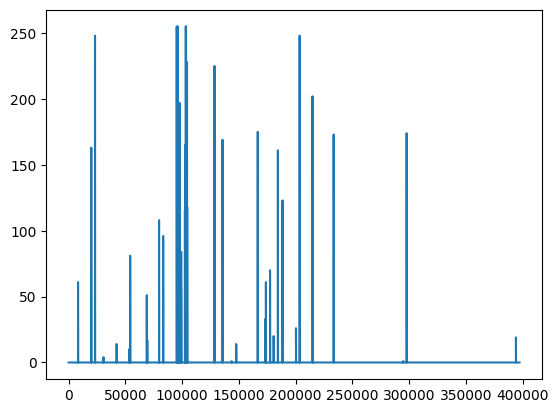

In [9]:
plt.plot(loaded_data_signal[index])